#COMPUTER VISION AND PATTERN RECOGNITION PROJECT 3

Kaan Egemen Sen - Ata Yurtsever - Baris Aksakal

##8 points Algorithm

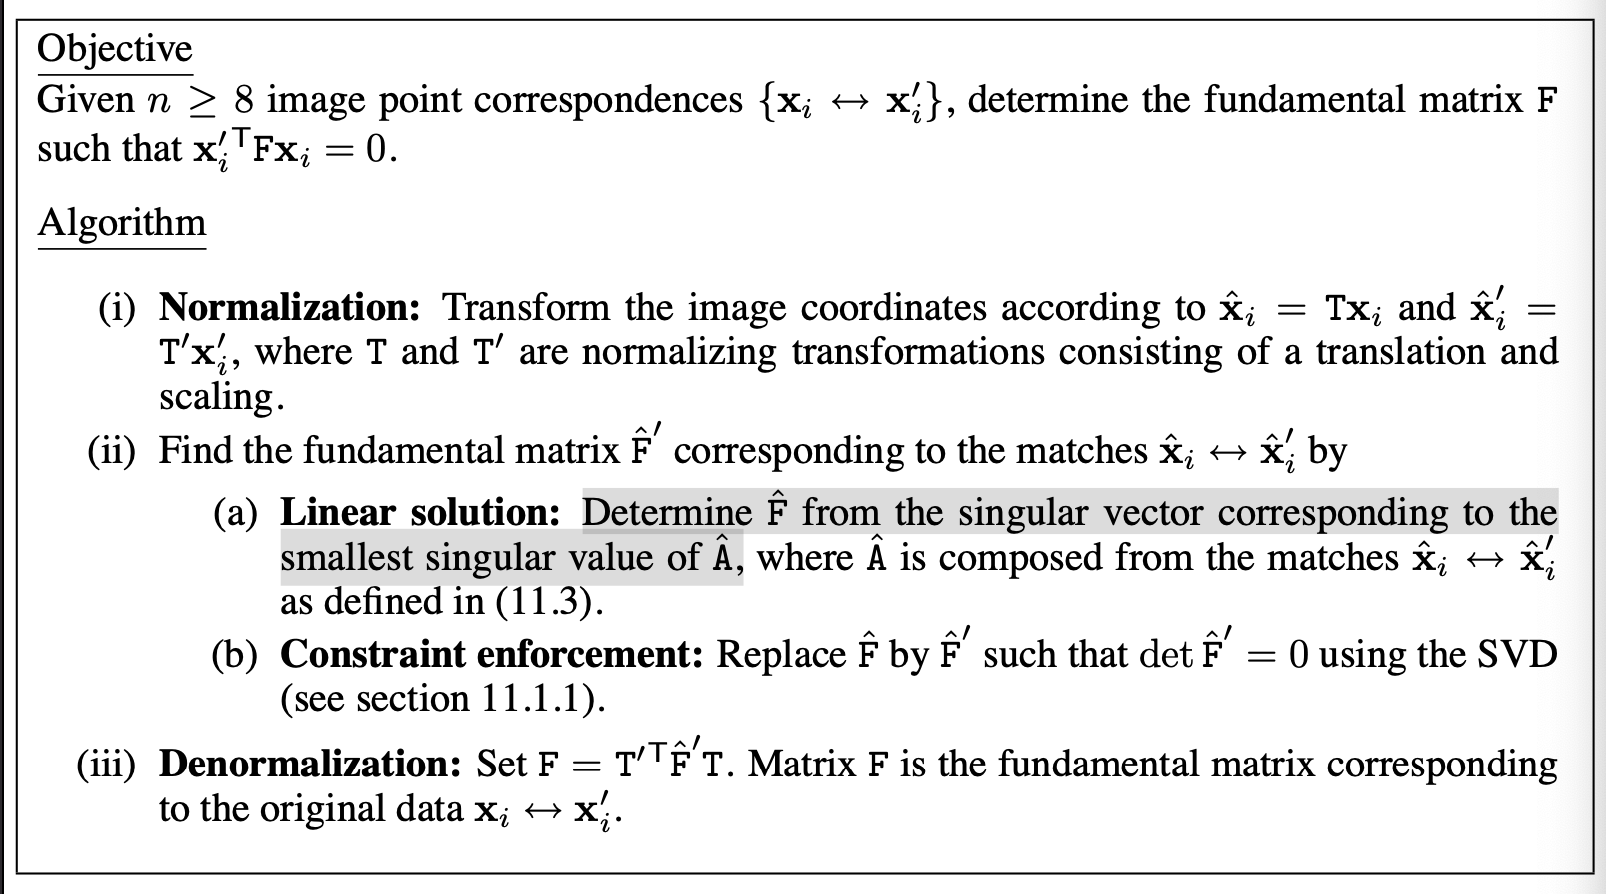

##Task 1

In [ ]:
import numpy as np
import cv2

# Image Coordinates
x = np.array([
    [182, 256, 1.0, 1.0],
    [263, 166, 1.0, 1.0],
    [306, 170, 1.0, 1.0],
    [386, 37, 1.0, 1.0],
    [476, 133, 1.0, 1.0],
    [363, 304, 1.0, 1.0],
    [260, 33, 1.0, 1.0],
    [431, 210, 1.0, 1.0],
    [175, 154, 1.0, 1.0],
    [465, 247, 1.0, 1.0]
])

# Image Coordinates for house2
x_prime = np.array([
    [183, 281, 1.0, 1.0],
    [219, 182, 1.0, 1.0],
    [239, 185, 1.0, 1.0],
    [440, 45, 1.0, 1.0],
    [513, 158, 1.0, 1.0],
    [246, 339, 1.0, 1.0],
    [217, 35, 1.0, 1.0],
    [420, 247, 1.0, 1.0],
    [180, 165, 1.0, 1.0],
    [505, 304, 1.0, 1.0]
])

import numpy as np

# BOOK Page 282 Section 11.2 Step (ii)
def compute_fundamental_matrix(x, xp):
    # Normalize the image coordinates
    x_hat, T = normalize_coordinates(x)
    x_hat_prime, T_prime = normalize_coordinates(xp)

    # Construct the matrix A
    A = construct_matrix_A(x_hat, x_hat_prime)

    # Determine Fˆ from the singular vector corresponding to the smallest singular value of A
    _, _, V = np.linalg.svd(A)
    F_hat = V[-1].reshape(3, 3)

    # Constraint Enforcement by det(F_hat) = 0
    U, S, V = np.linalg.svd(F_hat)
    S[-1] = 0
    F_hat = U @ np.diag(S) @ V

    # Denormalize the fundamental matrix
    F = T_prime.T @ F_hat @ T

    return F


def normalize_coordinates(points):
    # Compute centroid
    centroid = np.mean(points[:, :2], axis=0)

    # Translation matrix to move centroid to the origin
    T = np.array([
        [1, 0, -centroid[0]],
        [0, 1, -centroid[1]],
        [0, 0, 1]
    ])

    # Scale matrix to normalize average distance to sqrt(2)
    avg_distance = np.sqrt(2) / np.mean(np.linalg.norm(points[:, :2] - centroid, axis=1))
    S = np.array([
        [avg_distance, 0, 0],
        [0, avg_distance, 0],
        [0, 0, 1]
    ])

    # Transformation matrix
    T_norm = S @ T

    # Apply transformation to points
    points_homogeneous = np.column_stack((points[:, :2], np.ones(points.shape[0])))
    points_normalized = (T_norm @ points_homogeneous.T).T

    return points_normalized, T_norm


def construct_matrix_A(x, xp):
    A = np.empty((x.shape[0], 9))
    # Creation Matrix a from the matches x_hat and x_hat_prime
    for i in range(x.shape[0]):
        A[i] = [
            xp[i, 0] * x[i, 0],
            xp[i, 0] * x[i, 1],
            xp[i, 0],
            xp[i, 1] * x[i, 0],
            xp[i, 1] * x[i, 1],
            xp[i, 1],
            x[i, 0],
            x[i, 1],
            1
        ]
    return A

#Calling function
F = compute_fundamental_matrix(x, x_prime)


# Print the fundamental matrix F
print("Fundamental Matrix F:")
print(F)


Fundamental Matrix F:
[[ 1.56255153e-07 -3.68001971e-06 -2.67301838e-04]
 [ 5.50642756e-07 -1.40536382e-06  6.59307142e-03]
 [ 2.94990465e-04 -6.23477523e-03 -4.02354906e-02]]


##TASK 2

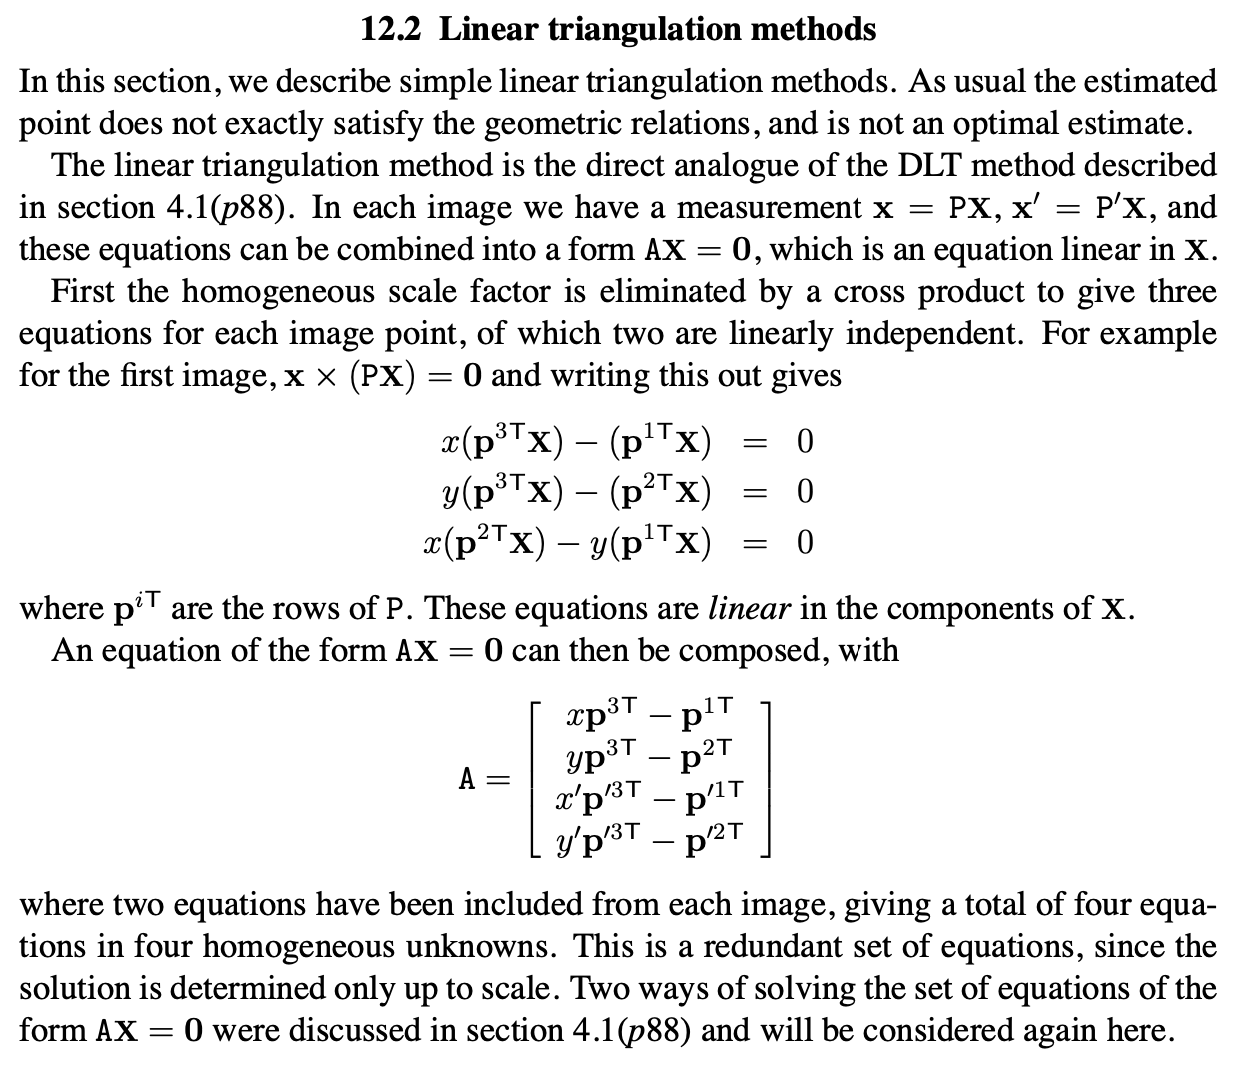



In [ ]:
# Construct the canonical camera pair
P_hat = np.hstack((np.eye(3), np.zeros((3, 1))))

#SLIDE 21 page 24
# Compute the right singular vector of F as e_prime
e_prime = np.linalg.svd(F)[2][-1]


e_prime_cross = np.array([
    [0, -e_prime[2], e_prime[1]],
    [e_prime[2], 0, -e_prime[0]],
    [-e_prime[1], e_prime[0], 0]
])

P_hat_prime = np.hstack((e_prime_cross @ F, e_prime.reshape(3, 1)))


#Defining Linear Triangulation Function to calculate 3d points
def linear_triangulation(P1, P2, x1, x2):
    num_points = x1.shape[0]
    pts = np.zeros((num_points, 4))

    for i in range(num_points):
        A = np.zeros((4, 4))
        A[0] = x1[i, 0] * P1[2].T - P1[0].T
        A[1] = x1[i, 1] * P1[2].T - P1[1].T
        A[2] = x2[i, 0] * P2[2].T - P2[0].T
        A[3] = x2[i, 1] * P2[2].T - P2[1].T

        #Getting the points
        _, _, V = np.linalg.svd(A)
        pts[i] = V[-1] / V[-1, 3]

    return pts
Points=linear_triangulation(P_hat,P_hat_prime,x,x_prime)
print("3D Coordinates of the 10 Points given ")
print(Points)


3D Coordinates of the 10 Points given 
[[147.12427884 206.94478638   0.80837527   1.        ]
 [179.68256471 113.41228425   0.6832037    1.        ]
 [191.81565585 106.56469766   0.62684858   1.        ]
 [133.42741846  12.7896744    0.34566689   1.        ]
 [141.93308789  39.65802751   0.29817877   1.        ]
 [219.25961103 183.62335353   0.604021     1.        ]
 [180.53907861  22.9145444    0.69438107   1.        ]
 [156.60345522  76.30384883   0.36334908   1.        ]
 [145.26692968 127.83519833   0.83009679   1.        ]
 [141.79996023  75.32236298   0.30494613   1.        ]]


#Task 3 below

In [ ]:

# Real World coordinates
real_coordinates = np.array([
    [-1.0, -1.0, 0.0, 1.0],
    [0.015545, -1.0, 0.965257, 1.0],
    [0.491684, -1.0, 0.965257, 1.0],
    [0.0, 1.03586, 2.1009, 1.0],
    [1.05319, 1.03586, 1.15121, 1.0],
    [1.22323, -1.22323, 0.0, 1.0],
    [0.0, -1.0, 2.1009, 1.0],
    [1.0, 0.234552, 0.489472, 1.0],
    [-1.05319, -1.0, 1.0, 1.0],
    [1.0, 1.0, 0.0, 1.0]
])

def compute_homography(real_coordinates, canonical_coordinates):
    # Construct the linear system
    A = []
    for i in range(len(real_coordinates)):
        x, y, z, _ = real_coordinates[i]
        x_prime, y_prime, z_prime, _ = canonical_coordinates[i]

        An = np.array([[x, y, z, 1, 0, 0, 0, 0, 0, 0, 0, 0, -x_prime*x, -x_prime*y, -x_prime*z, -x_prime],
                       [0, 0, 0, 0, x, y, z, 1, 0, 0, 0, 0, -y_prime*x, -y_prime*y, -y_prime*z, -y_prime],
                       [0, 0, 0, 0, 0, 0, 0, 0, x, y, z, 1, -z_prime*x, -z_prime*y, -z_prime*z, -z_prime]])

        A.extend(An)

    A = np.array(A)

    # Solve the linear system using SVD
    _, _, V = np.linalg.svd(A)
    h = V[-1] / V[-1, -1]

    # Reshape the solution into a 4x4 homography matrix
    H = h.reshape(4, 4)

    return H

H=compute_homography(real_coordinates,Points)

#Normalization
H=H/H[3,3]
print(H)



[[ 2.42612818e+01  4.00357414e+01 -1.52771372e+00  1.43463851e+02]
 [-3.01411802e+00  2.30843013e+00 -4.55942905e+01  1.11012231e+02]
 [-3.80204684e-02  4.33453151e-02 -6.92356943e-03  4.41394937e-01]
 [ 5.26282831e-02  4.07248250e-01 -2.10796242e-02  1.00000000e+00]]


##TASK 4

In [ ]:
# Image points for yj and y′j
yj = np.array([[182, 256, 1,1],
               [263, 166, 1,1],
               [306, 170, 1,1],
               [386, 37, 1,1],
               [476, 133, 1,1]])

yj_prime = np.array([[183, 281, 1,1],
                     [219, 182, 1,1],
                     [239, 185, 1,1],
                     [440, 45, 1,1],
                     [513, 158, 1,1]])


# Perform matrix multiplication of H_inv and P_hat to find P and P_prime Slide 21 Page (25)
P=P_hat@np.linalg.inv(H)
P_prime=P_hat_prime@np.linalg.inv(H)

Yj = linear_triangulation(P, P_prime, yj, yj_prime)
print("Real World Coordinates of 5 points in image:")
print(Yj)


Real World Coordinates of 5 points in image:
[[ 1.28993088e+02  1.16593593e+00  4.09897584e-02  1.00000000e+00]
 [ 1.59676186e+02 -3.53016166e+00 -2.61177955e-02  1.00000000e+00]
 [ 1.66347181e+02 -4.58367489e+00 -4.10564039e-02  1.00000000e+00]
 [ 2.94335584e+02 -2.09773084e+01 -3.08514959e-01  1.00000000e+00]
 [ 2.10214005e+02 -9.70313755e+00 -1.31551575e-01  1.00000000e+00]]
